<a href="https://colab.research.google.com/github/abilal19/Image-Compressions-Using-Kmeans/blob/main/HW1Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from PIL import Image
import pandas as pd
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
import os.path


In [4]:
# from google.colab import files
# uploaded = files.upload()


Saving beach.bmp to beach.bmp
Saving football.bmp to football.bmp


In [20]:
image = Image.open('beach.bmp')
# convert image to numpy array
data_0 = asarray(image)
print(type(data_0))
# summarize shape
print(data_0.shape)




<class 'numpy.ndarray'>
(214, 320, 3)


In [21]:
data=data_0.reshape(-1,3)
data[:10]

array([[110, 154, 201],
       [110, 154, 201],
       [110, 154, 201],
       [110, 154, 201],
       [110, 154, 201],
       [110, 154, 201],
       [109, 153, 200],
       [109, 153, 200],
       [109, 151, 199],
       [109, 151, 199]], dtype=uint8)

(68480, 3)


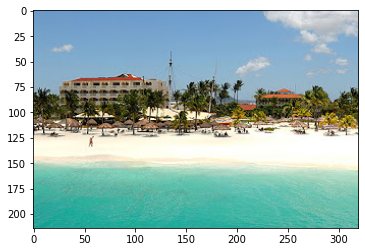

In [22]:
# img = Image.fromarray(data, 'RGB')
print(data.shape)
data1 = data.reshape(data_0.shape)

plt.imshow(data1)


In [46]:

def kmeans(array,k, max_iter=100):
  init_dict = {'cluster_{}'.format(c): [np.random.randint(0,255),np.random.randint(0,255),np.random.randint(0,255)] for c in range(k+1)}
  iter = 1
  
  while iter <= max_iter:
    print(init_dict)
    #track last last cluster values
    last_cluster_dict = init_dict.copy()
    #empty list for appending new image's cluster values
    new_img = []
    cluster_list = {}
    for cluster_n in init_dict.keys():
      cluster_list[cluster_n] = []

    for pixel in array:
      distances = []
      
      for cluster in init_dict.values():
        if cluster == []:
          continue
        else:
          pixel_dist = ((pixel[0]-cluster[0])**2 + (pixel[1]-cluster[1])**2 + (pixel[2]-cluster[2])**2)**0.5
          distances.append(pixel_dist)
      clust_index = distances.index(min(distances))

      cluster_list['cluster_{}'.format(clust_index)].append(pixel)
      new_img.append(init_dict['cluster_{}'.format(clust_index)])



    #make new clusters

    for cluster_n,cluster_pixel in cluster_list.items():
      if cluster_pixel == []:
        continue
      else:
        new_value = []
        for i in range(3):
          new_c = [c_list[i] for c_list in cluster_pixel]
          new_value.append(int(sum(new_c)/len(new_c)))
        init_dict[cluster_n] = new_value

    if init_dict == last_cluster_dict:
      print('converged! Iterations=',iter)
      return np.array(new_img)
      break
    

    print('iteration:{}'.format(iter))
    iter += 1
    


        





Streaming output truncated to the last 5000 lines.
[18.49324200890693, 153.19595294915595, 172.28174598604463]
[29.49576240750525, 165.77394246382633, 159.4145539152558]
[28.178005607210743, 164.98787834262248, 163.19620093617377]
[55.40758070878027, 193.1243122965102, 139.96070877214075]
[41.23105625617661, 178.51330482627898, 161.60136138040423]
[51.90375708944392, 188.4595447304275, 160.75136080294934]
[54.653453687758834, 192.88338445807094, 148.87578715157142]
[49.48737212663449, 188.18607812481773, 159.63082409108839]
[48.641546028061235, 188.05584277017292, 153.39165557487146]
[30.265491900843113, 170.2791825209412, 165.5868352255094]
[36.29049462324811, 174.62531317080007, 169.723304233685]
[63.631753079732135, 202.32152628922114, 158.65055940651453]
[65.79513659838392, 203.3568292435737, 162.4130536625674]
[50.941142507800116, 187.5846475594418, 170.37605465557652]
[38.06573262134856, 177.80326206231425, 167.13467623446667]
[46.57252408878007, 181.40011025354974, 166.246804480

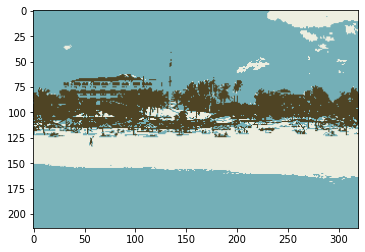

In [41]:
model_1 = kmeans(data,2,30)
model_1.shape
img_1 = model_1.reshape(data_0.shape)
plt.imshow(img_1)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
converged! Iterations= 24


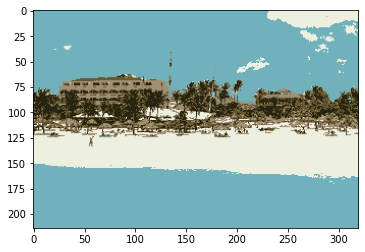

In [161]:
model_1 = kmeans(data,4,30)
model_1.shape
img_1 = model_1.reshape(data_0.shape)
plt.imshow(img_1)




{'cluster_0': [123, 253, 162], 'cluster_1': [209, 180, 225], 'cluster_2': [142, 205, 215], 'cluster_3': [176, 72, 217], 'cluster_4': [54, 205, 184], 'cluster_5': [157, 183, 0], 'cluster_6': [43, 151, 53], 'cluster_7': [130, 27, 193], 'cluster_8': [66, 104, 29]}
iteration:1
{'cluster_0': [169, 174, 118], 'cluster_1': [236, 235, 221], 'cluster_2': [133, 176, 197], 'cluster_3': [156, 128, 121], 'cluster_4': [70, 178, 162], 'cluster_5': [174, 132, 65], 'cluster_6': [114, 125, 119], 'cluster_7': [106, 113, 139], 'cluster_8': [75, 66, 38]}
iteration:2
{'cluster_0': [184, 169, 142], 'cluster_1': [240, 240, 226], 'cluster_2': [132, 177, 199], 'cluster_3': [153, 136, 116], 'cluster_4': [69, 178, 162], 'cluster_5': [163, 115, 50], 'cluster_6': [116, 111, 94], 'cluster_7': [105, 123, 138], 'cluster_8': [60, 55, 27]}
iteration:3
{'cluster_0': [189, 174, 150], 'cluster_1': [241, 242, 227], 'cluster_2': [133, 178, 199], 'cluster_3': [154, 138, 115], 'cluster_4': [69, 178, 162], 'cluster_5': [157, 10

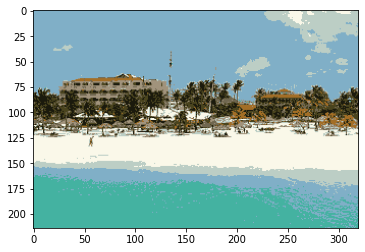

In [180]:
model_1 = kmeans(data,8)
model_1.shape
img_1 = model_1.reshape(data_0.shape)
plt.imshow(img_1)

{'cluster_0': [226, 73, 213], 'cluster_1': [214, 184, 248], 'cluster_2': [141, 147, 231], 'cluster_3': [115, 164, 4], 'cluster_4': [243, 65, 168], 'cluster_5': [135, 79, 177], 'cluster_6': [109, 164, 165], 'cluster_7': [155, 209, 92], 'cluster_8': [83, 48, 235], 'cluster_9': [75, 230, 244], 'cluster_10': [200, 224, 58], 'cluster_11': [111, 176, 123], 'cluster_12': [183, 49, 78], 'cluster_13': [135, 0, 205], 'cluster_14': [184, 119, 248], 'cluster_15': [79, 4, 85], 'cluster_16': [87, 221, 45]}
iteration:1
{'cluster_0': [226, 73, 213], 'cluster_1': [234, 236, 223], 'cluster_2': [134, 173, 204], 'cluster_3': [111, 101, 29], 'cluster_4': [212, 149, 144], 'cluster_5': [125, 108, 124], 'cluster_6': [94, 179, 172], 'cluster_7': [188, 164, 124], 'cluster_8': [83, 48, 235], 'cluster_9': [75, 230, 244], 'cluster_10': [211, 173, 65], 'cluster_11': [137, 129, 109], 'cluster_12': [148, 92, 64], 'cluster_13': [135, 0, 205], 'cluster_14': [184, 119, 248], 'cluster_15': [50, 47, 26], 'cluster_16': [87

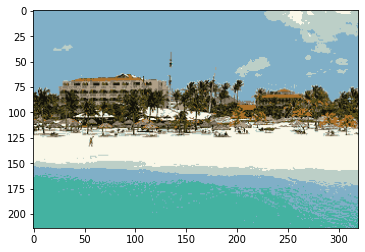

In [52]:
model_1 = kmeans(data,16)
model_1.shape
img_1 = model_1.reshape(data_0.shape)
plt.imshow(img_1)

In [6]:
image2 = Image.open('football.bmp')
# convert image to numpy array
data_2 = asarray(image2)
print(type(data_2))
# summarize shape
print(data_2.shape)

<class 'numpy.ndarray'>
(412, 620, 3)


(412, 620, 3)
<class 'numpy.ndarray'>


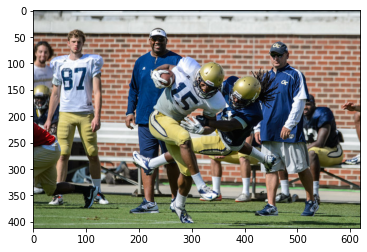

In [42]:
# img = Image.fromarray(data, 'RGB')
print(data2.shape)
data2 = data2.reshape(data_2.shape)


plt.imshow(data2)


In [43]:
data2=data_2.reshape(-1,3)
data2[:10]

array([[76, 84, 87],
       [73, 81, 84],
       [68, 76, 79],
       [63, 71, 74],
       [58, 66, 69],
       [56, 64, 67],
       [55, 63, 66],
       [55, 63, 66],
       [52, 61, 60],
       [50, 59, 58]], dtype=uint8)

{'cluster_0': [1, 87, 253], 'cluster_1': [141, 9, 118], 'cluster_2': [46, 141, 147]}
iteration:1
{'cluster_0': [1, 87, 253], 'cluster_1': [80, 62, 49], 'cluster_2': [149, 155, 146]}
iteration:2
{'cluster_0': [28, 82, 154], 'cluster_1': [56, 59, 54], 'cluster_2': [175, 169, 154]}
iteration:3
{'cluster_0': [46, 82, 129], 'cluster_1': [60, 60, 49], 'cluster_2': [179, 171, 156]}
iteration:4
{'cluster_0': [66, 92, 116], 'cluster_1': [60, 58, 45], 'cluster_2': [182, 173, 158]}
iteration:5
{'cluster_0': [98, 108, 99], 'cluster_1': [45, 44, 37], 'cluster_2': [189, 179, 167]}
iteration:6
{'cluster_0': [116, 113, 95], 'cluster_1': [35, 39, 40], 'cluster_2': [196, 189, 180]}
iteration:7
{'cluster_0': [123, 117, 96], 'cluster_1': [34, 40, 43], 'cluster_2': [198, 193, 185]}
iteration:8
{'cluster_0': [126, 119, 97], 'cluster_1': [35, 42, 45], 'cluster_2': [200, 195, 187]}
iteration:9
{'cluster_0': [129, 121, 98], 'cluster_1': [36, 43, 46], 'cluster_2': [200, 196, 188]}
iteration:10
{'cluster_0': [13

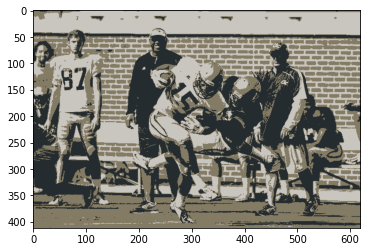

In [48]:
model_2 = kmeans(data2,2,30)
model_2.shape
img_2 = model_2.reshape(data_2.shape)
plt.imshow(img_2)

{'cluster_0': [251, 149, 47], 'cluster_1': [128, 71, 23], 'cluster_2': [20, 233, 13], 'cluster_3': [178, 42, 62], 'cluster_4': [105, 231, 53]}
iteration:1
{'cluster_0': [203, 192, 179], 'cluster_1': [62, 68, 63], 'cluster_2': [20, 233, 13], 'cluster_3': [159, 113, 98], 'cluster_4': [145, 163, 148]}
iteration:2
{'cluster_0': [206, 203, 197], 'cluster_1': [45, 52, 53], 'cluster_2': [20, 233, 13], 'cluster_3': [139, 123, 91], 'cluster_4': [152, 151, 143]}
iteration:3
{'cluster_0': [208, 208, 204], 'cluster_1': [39, 46, 49], 'cluster_2': [20, 233, 13], 'cluster_3': [129, 119, 88], 'cluster_4': [165, 154, 142]}
iteration:4
{'cluster_0': [209, 211, 210], 'cluster_1': [37, 44, 47], 'cluster_2': [20, 233, 13], 'cluster_3': [123, 116, 89], 'cluster_4': [173, 158, 142]}
iteration:5
{'cluster_0': [210, 213, 214], 'cluster_1': [35, 42, 46], 'cluster_2': [20, 233, 13], 'cluster_3': [120, 115, 90], 'cluster_4': [177, 161, 143]}
iteration:6
{'cluster_0': [211, 215, 216], 'cluster_1': [35, 41, 45], 'c

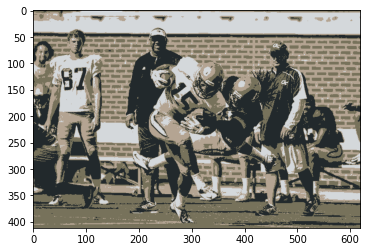

In [49]:
model_2 = kmeans(data2,4)
model_2.shape
img_2 = model_2.reshape(data_2.shape)
plt.imshow(img_2)

{'cluster_0': [27, 0, 212], 'cluster_1': [54, 95, 236], 'cluster_2': [172, 98, 177], 'cluster_3': [110, 36, 68], 'cluster_4': [25, 146, 234], 'cluster_5': [75, 122, 58], 'cluster_6': [113, 25, 161], 'cluster_7': [223, 50, 134], 'cluster_8': [249, 57, 126]}
iteration:1
{'cluster_0': [4, 64, 130], 'cluster_1': [50, 94, 162], 'cluster_2': [189, 181, 172], 'cluster_3': [53, 44, 41], 'cluster_4': [115, 166, 244], 'cluster_5': [96, 109, 83], 'cluster_6': [44, 76, 137], 'cluster_7': [180, 108, 82], 'cluster_8': [229, 82, 76]}
iteration:2
{'cluster_0': [9, 56, 111], 'cluster_1': [82, 112, 158], 'cluster_2': [197, 193, 185], 'cluster_3': [37, 37, 31], 'cluster_4': [136, 161, 210], 'cluster_5': [108, 117, 88], 'cluster_6': [45, 75, 122], 'cluster_7': [165, 120, 94], 'cluster_8': [205, 35, 44]}
iteration:3
{'cluster_0': [10, 53, 105], 'cluster_1': [101, 121, 149], 'cluster_2': [204, 200, 192], 'cluster_3': [36, 36, 29], 'cluster_4': [147, 160, 181], 'cluster_5': [108, 116, 83], 'cluster_6': [51, 

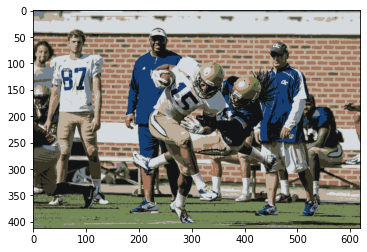

In [50]:
model_2 = kmeans(data2,8)
model_2.shape
img_2 = model_2.reshape(data_2.shape)
plt.imshow(img_2)

{'cluster_0': [216, 236, 59], 'cluster_1': [218, 138, 151], 'cluster_2': [235, 146, 39], 'cluster_3': [75, 69, 225], 'cluster_4': [72, 189, 134], 'cluster_5': [79, 170, 110], 'cluster_6': [41, 114, 218], 'cluster_7': [51, 47, 91], 'cluster_8': [246, 244, 179], 'cluster_9': [7, 15, 127], 'cluster_10': [174, 161, 103], 'cluster_11': [171, 199, 105], 'cluster_12': [250, 119, 205], 'cluster_13': [253, 228, 155], 'cluster_14': [175, 236, 121], 'cluster_15': [245, 116, 21], 'cluster_16': [210, 129, 194]}
iteration:1
{'cluster_0': [217, 201, 82], 'cluster_1': [194, 171, 157], 'cluster_2': [179, 141, 40], 'cluster_3': [85, 100, 173], 'cluster_4': [115, 142, 173], 'cluster_5': [109, 128, 98], 'cluster_6': [65, 105, 171], 'cluster_7': [48, 50, 48], 'cluster_8': [217, 221, 223], 'cluster_9': [3, 58, 118], 'cluster_10': [157, 131, 106], 'cluster_11': [194, 191, 122], 'cluster_12': [250, 119, 205], 'cluster_13': [227, 209, 146], 'cluster_14': [176, 204, 157], 'cluster_15': [198, 34, 39], 'cluster_1

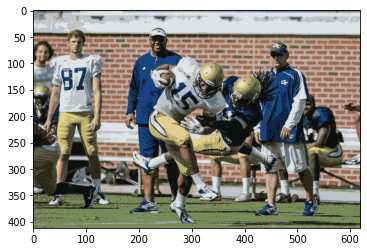

In [51]:
model_2 = kmeans(data2,16)
model_2.shape
img_2 = model_2.reshape(data_2.shape)
plt.imshow(img_2)